In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv("/Users/adel/Desktop/Issachar Technologies/Cpi-Project-Updated/CPI-Project 2/Cpi-Compiled-Data-1990.csv")

In [3]:
#create a data dictionary to change the names of the column

colmn_dict = {"CPIAUCSL" : "CPI",
             "CUSR0000SETG01": "Airline_Fares",
             "CUSR0000SAF116": "Alcoholic_Beverages",
             "CPIAPPSL": "Apparel",
             "CUSR0000SAD": "Durables",
             "CUSR0000SEHF01":" Electricity",
             "CPIENGSL": "Energy",
             "CPIUFDSL": "Food",
             "CUSR0000SEHE":"Fuel_Oil",
             "CUSR0000SETB01":"Gasoline",
             "CPIHOSSL":"Housing",
             "CPIMEDSL":"Medical_Care",
             "CUSR0000SAM1":"Medical_Care_Commodities",
             "CUSR0000SETA01": "New_Vehicles",
             "CUUR0000SA0R": "Purchasing_Power",
             "CUSR0000SEHA": "Rent",
             "CUSR0000SAH1": "Shelter",
             "CPITRNSL":"Transportation",
             "CUSR0000SETA02":"Used_Cars_Trucks"}

In [4]:
#Rename the column names
data = data.rename(columns = colmn_dict)
data

,DATE,CPI,Airline_Fares,Alcoholic_Beverages,Apparel,Durables,Electricity,Energy,Food,Fuel_Oil,Gasoline,Housing,Medical_Care,Medical_Care_Commodities,New_Vehicles,Purchasing_Power,Rent,Shelter,Transportation,Used_Cars_Trucks
0,1990-01-01,127.500,134.800,126.700,119.900,113.300,116.000,98.900,129.700,110.600,92.900,126.100,156.000,157.300,121.300,78.5,135.800,136.300,117.000,119.200
1,1990-02-01,128.000,138.200,127.000,122.000,113.400,117.200,98.200,130.800,92.800,93.000,126.200,157.100,158.700,121.200,78.2,136.100,136.600,117.200,118.700
2,1990-03-01,128.600,141.000,127.600,123.800,113.300,117.100,97.600,131.000,89.800,92.300,126.800,158.300,159.700,120.900,77.7,136.700,137.600,117.300,118.500
3,1990-04-01,128.900,144.100,127.900,124.100,113.200,117.800,97.500,130.800,88.400,92.800,127.100,159.600,160.900,120.800,77.6,137.200,138.200,117.700,118.200
4,1990-05-01,129.100,145.900,128.600,124.000,113.200,117.500,96.700,131.100,87.500,91.700,127.300,160.800,161.800,120.900,77.4,137.600,138.600,117.500,117.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,2022-05-01,291.474,336.022,272.413,126.927,127.541,248.505,308.839,301.879,508.909,372.063,297.881,543.220,386.273,171.254,34.2,365.365,350.418,270.297,207.518
389,2022-06-01,295.328,329.906,273.553,127.929,128.476,252.804,332.087,304.867,505.445,413.606,300.290,546.861,387.787,172.369,33.7,368.203,352.550,280.691,210.863
390,2022-07-01,295.271,304.071,274.889,127.818,128.864,256.780,316.955,308.220,464.597,381.710,301.639,549.282,390.077,173.432,33.8,370.789,354.449,274.821,209.998
391,2022-08-01,295.620,290.010,275.861,128.091,129.490,260.643,301.045,310.664,453.418,341.383,304.109,553.006,391.032,174.891,33.8,373.525,356.894,268.586,209.782


In [5]:
#Check for missing values

data.isna().sum()

DATE                        0
CPI                         0
Airline_Fares               0
Alcoholic_Beverages         0
Apparel                     0
Durables                    0
 Electricity                0
Energy                      0
Food                        0
Fuel_Oil                    0
Gasoline                    0
Housing                     0
Medical_Care                0
Medical_Care_Commodities    0
New_Vehicles                0
Purchasing_Power            0
Rent                        0
Shelter                     0
Transportation              0
Used_Cars_Trucks            0
dtype: int64

In [28]:
def evaluate_linear_regression_assumptions(x,y):
    """
    This function automatically evaluates the assumptions of linear regression
    for multiple feautures in a dataset
    
        
    Returns:
        A dictionary containing the results of the check
        
    """
    sns.scatterplot(x=x, y=y, data = data)
    plt.title("Scatter plot")
    plt.show()
    
    #Fit OLS model
   
    ols_formula = "y ~ x"

    #fit the model
    model = ols(formula = ols_formula, data = data)
    model = model.fit()
    print(model.summary())
    
    residuals = model.resid
    
   # Create a figure and subplots grid using Matplotlib
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))  # 1 rows, 2 column

    # Plot 1: Histogram plot using Seaborn in the first subplot (axs[0])
    sns.histplot(x=residuals, data=data, ax=axs[0])
    axs[0].set_title('Histogram of residuals')

    # Plot 2: QQ plot using Seaborn in the second subplot (axs[1])
    sm.qqplot(residuals, ax=axs[1],line = 's')
    axs[1].set_title('QQ plot of residuals')

    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()
    
    fitted_values = model.fittedvalues
    sns.scatterplot(x=fitted_values, y=residuals)

    # Set the x-axis label.
    plt.xlabel("fitted_values")
    # Set the y-axis label.
    plt.ylabel("residuals")
    # Set the title.
    plt.title("Homoscedasticity Assupmtion")
    # Add a line at y = 0 to visualize the variance of residuals above and below 0.
    plt.axhline(y=0, color='red', linestyle='--')
 

    plt.show()

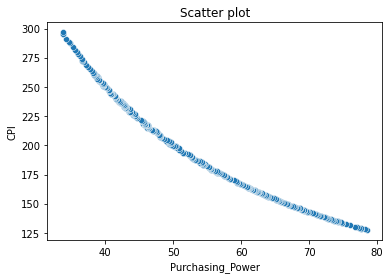

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     9615.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.16e-277
Time:                        21:54:41   Log-Likelihood:                -1392.8
No. Observations:                 393   AIC:                             2790.
Df Residuals:                     391   BIC:                             2798.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    389.0003      1.972    197.245      0.0

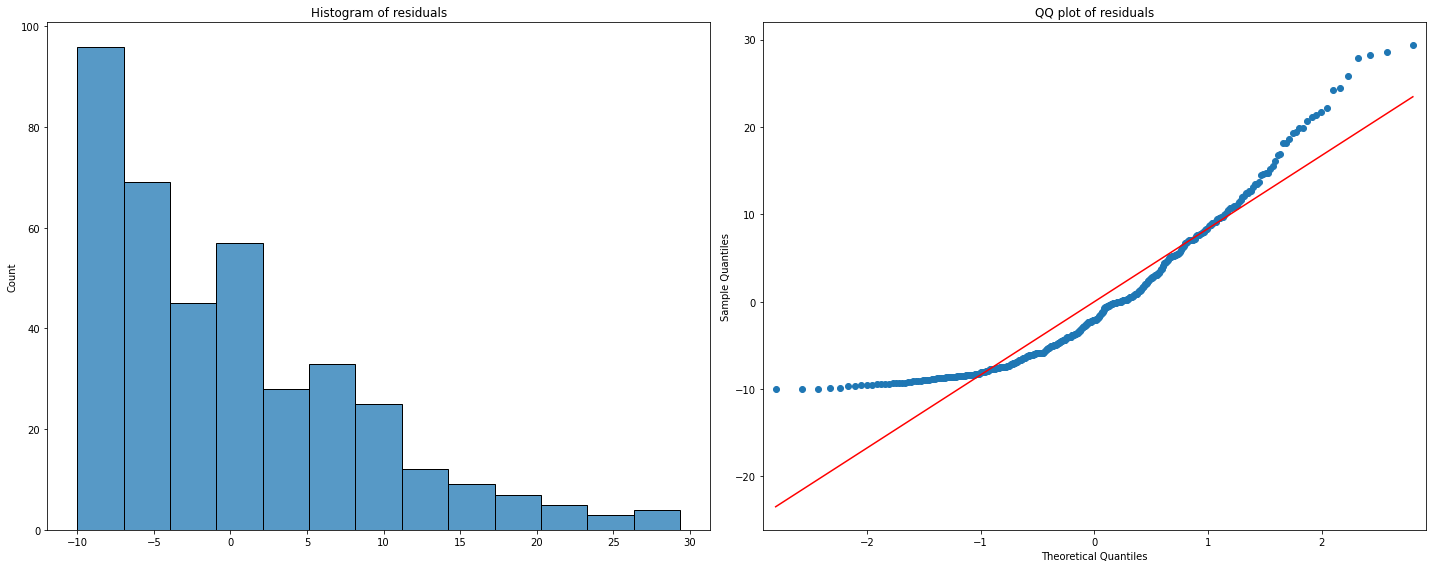

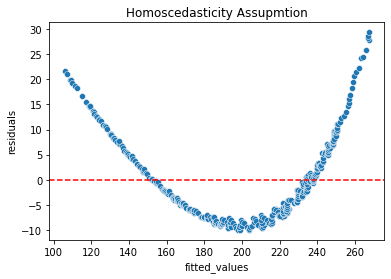

In [31]:
evaluate_linear_regression_assumptions(data['Purchasing_Power'],data['CPI'])

In [32]:
def evaluate_linear_regression_assumptions(x1,x2,y):
    """
    This function automatically evaluates the assumptions of linear regression
    for multiple feautures in a dataset
    
        
    Returns:
        A dictionary containing the results of the check
        
    """
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 rows, 2 column
    sns.scatterplot(x=x1, y=y, data = data, ax=axes[0])
    sns.scatterplot(x=x2, y=y, data = data, ax=axes[1])
    plt.title("Scatter plot")
    plt.show()
    
    #Fit OLS model
   
    ols_formula = "y ~ x1 + x2"

    #fit the model
    model = ols(formula = ols_formula, data = data)
    model = model.fit()
    print(model.summary())
    
    residuals = model.resid
    
   # Create a figure and subplots grid using Matplotlib
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))  # 1 rows, 2 column

    # Plot 1: Histogram plot using Seaborn in the first subplot (axs[0])
    sns.histplot(x=residuals, data=data, ax=axs[0])
    axs[0].set_title('Histogram of residuals')

    # Plot 2: QQ plot using Seaborn in the second subplot (axs[1])
    sm.qqplot(residuals, ax=axs[1],line = 's')
    axs[1].set_title('QQ plot of residuals')

    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()
    
    fitted_values = model.fittedvalues
    sns.scatterplot(x=fitted_values, y=residuals)

    # Set the x-axis label.
    plt.xlabel("fitted_values")
    # Set the y-axis label.
    plt.ylabel("residuals")
    # Set the title.
    plt.title("Homoscedasticity Assupmtion")
    # Add a line at y = 0 to visualize the variance of residuals above and below 0.
    plt.axhline(y=0, color='red', linestyle='--')
 

    plt.show()

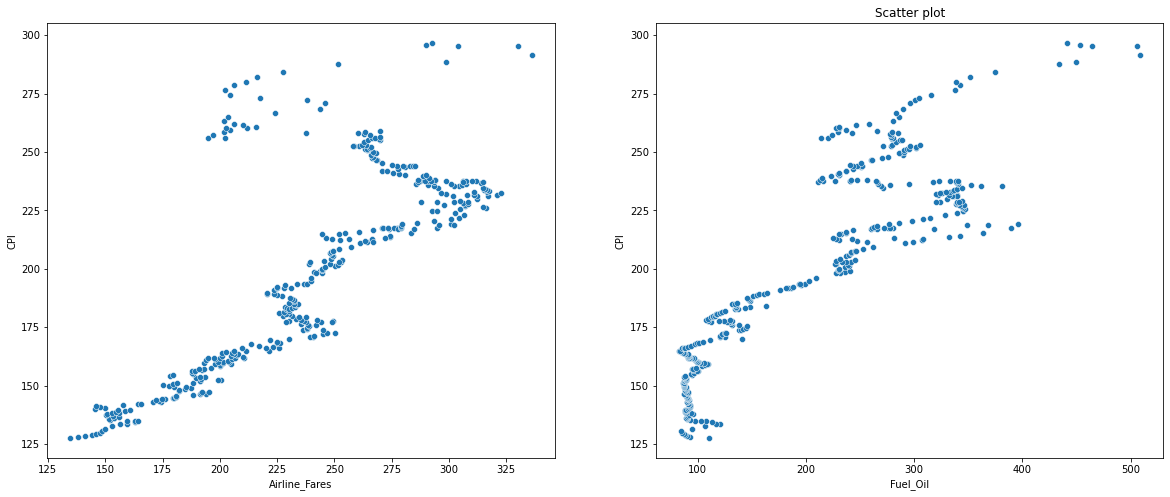

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     743.9
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          7.95e-134
Time:                        22:00:47   Log-Likelihood:                -1721.1
No. Observations:                 393   AIC:                             3448.
Df Residuals:                     390   BIC:                             3460.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.0416      6.290     17.654      0.0

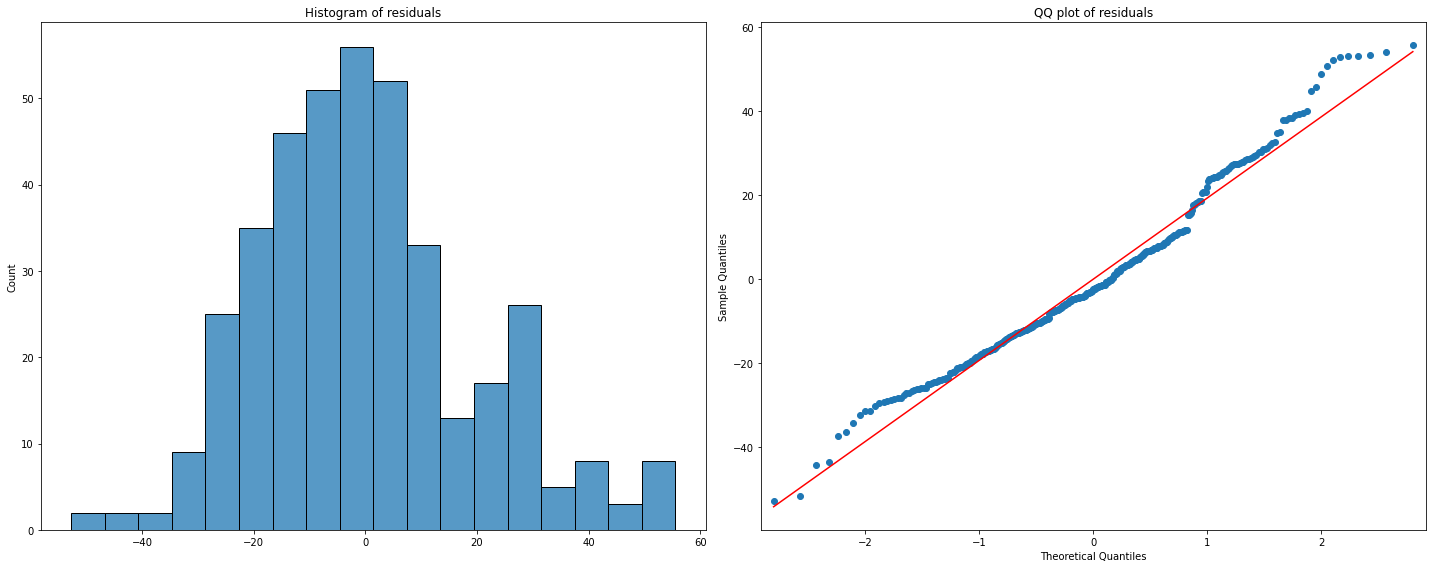

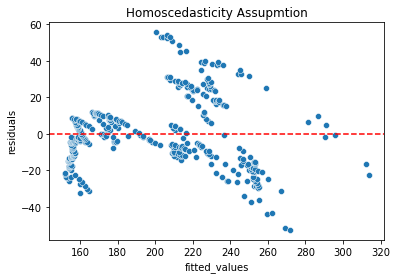

In [33]:
evaluate_linear_regression_assumptions(data['Airline_Fares'], data['Fuel_Oil'],data['CPI'])